# Chemical Process Anomaly Detection Baseline üïµÔ∏è
### ÌôîÌïô Í≥µÏ†ï Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÏÑùÌïòÍ≥† üßê, Ïù¥ÏÉÅ ÌÉêÏßÄ Baseline Model ÏùÑ ÌïôÏäµÌï©ÎãàÎã§ üìñ.


## Table of Contents
1. ÌïÑÏöî Library Import
2. Load Data
3. EDA
4. Data Process
5. Model Training
6. Model Inference


### 1. ÌïÑÏöî Library Import

- ÌïÑÏöî Library ÏÑ§ÏπòÎ•º ÏúÑÌï¥ ÏïÑÎûò Î™ÖÎ†πÏñ¥Î•º Ïã§Ìñâ Ìï©ÎãàÎã§.
- (Ïã§Ìñâ Ï¥àÍ∏∞Ïóê Ìïú Î≤àÎßå Ïã§ÌñâÌïòÎ©¥ Îê©ÎãàÎã§!)

In [1]:
# ! pip install -r requirements.txt

- ÎÖ∏Ìä∏Î∂ÅÏóêÏÑú ÏÇ¨Ïö©ÌïòÎäî ÌïÑÏöî Library Î•º import Ìï©ÎãàÎã§

In [2]:
from typing import Union
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from pathlib import Path
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import SGDOneClassSVM

- Î™®Îç∏ ÌïôÏäµÏóê ÌïÑÏöîÌïú `random_seed` Î•º ÏÑ§Ï†ïÌïòÍ≥†, `DATA_PATH` Î•º ÏÑ§Ï†ïÌï©ÎãàÎã§.
- Ìï¥Îãπ `DATA_PATH` ÏóêÎäî `train.csv`, `test.csv` ÌååÏùºÏù¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.

In [3]:
RANDOM_SEED = 42
DATA_PATH = Path("../data")

np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)


### 2. Load Train Data


In [4]:
train_data = pd.read_csv(DATA_PATH / "train.csv")

### 3. EDA

### 3.1 Îç∞Ïù¥ÌÑ∞ Ïú†Ìòï ÌôïÏù∏

- ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Îäî Ï¥ù 2500000 Í∞úÏùò row ÏôÄ 55Í∞úÏùò columnÏùÑ Í∞ñÍ≥† ÏûàÏäµÎãàÎã§.

In [5]:
train_data.shape

(250000, 55)

Í∞Å columnÏùò ÏùòÎØ∏Îäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.
- `faultNumber` : Ï†ïÏÉÅÏù∏ÏßÄ, ÎπÑÏ†ïÏÉÅÏù∏ÏßÄ ÎÇòÌÉÄÎÇ¥Îäî Label ÏûÖÎãàÎã§. Ï†ïÏÉÅÏùº Í≤ΩÏö∞ `0`, ÎπÑÏ†ïÏÉÅÏùº Í≤ΩÏö∞ `1` ÏûÖÎãàÎã§. 
- `simulationRun` : ÏãúÎÆ¨Î†àÏù¥ÏÖòÏù¥ Ïã§ÌñâÎêú Run Ïùò Î≤àÌò∏ ÏûÖÎãàÎã§. 
  - ÎèôÏùºÌïú ÌïòÎÇòÏùò `simulationRun` Ïù¥ Ï†ïÏÉÅÏùº Í≤ΩÏö∞ `faultNumber` Í∞Ä Î™®Îëê `0` ÏûÖÎãàÎã§.
  - Î∞òÎåÄÎ°ú ÌïòÎÇòÏùò `simulationRun` Ïù¥ ÎπÑÏ†ïÏÉÅÏùº Í≤ΩÏö∞ `faultNumber` Í∞Ä Î™®Îëê `1` ÏûÖÎãàÎã§.
  - ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏóêÎäî Ï†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Îßå Ï°¥Ïû¨Ìï©ÎãàÎã§. Îî∞ÎùºÏÑú `faultNumber` Í∞Ä Î™®Îëê `0` ÏûÖÎãàÎã§.
  - ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÎäî Ï†ïÏÉÅ/ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Í∞Ä Î™®Îëê Ï°¥Ïû¨Ìï©ÎãàÎã§. Îî∞ÎùºÏÑú `faultNumber` Í∞Ä Î™®Îëê `0`Ïù∏ `simulationRun` ÎèÑ ÏûàÍ≥†, `faultNumber` Î™®Îëê `1`Ïù∏ `simulationRun` ÎèÑ ÏûàÏäµÎãàÎã§.
- `sample` : ÌïòÎÇòÏùò Run ÏïàÏùò sample Î≤àÌò∏Î•º ÏùòÎØ∏Ìï©ÎãàÎã§. ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Îäî Ìïú Run Îãπ 500 sample Ïù¥ ÏûàÏäµÎãàÎã§.
- `xmeas_*` : measurement Ïùò ÏïΩÏûêÎ°ú, ÌôîÌïô Í≥µÏ†ïÏóêÏÑú Ï∏°Ï†ïÎêú ÏÑºÏÑú Í∞í ÏûÖÎãàÎã§.
- `xmv_*` : manipulated variable Ïùò ÏïΩÏûêÎ°ú, ÌôîÌïô Í≥µÏ†ïÏóêÏÑú Ï†úÏñ¥ÎêòÎäî Í∞í ÏûÖÎãàÎã§.
    - measurement ÏôÄ manipulated Í¥ÄÎ†® ÏÑ§Î™ÖÏùÄ [Îã§Ïùå ÏûêÎ£å](https://chemicalada.blogspot.com/2016/02/classification-of-variables-in-chemical.html)Î•º Ï∞∏Í≥†ÌïòÏãúÍ∏∞ Î∞îÎûçÎãàÎã§.
    

In [6]:
train_data.describe()

faultNumber  simulationRun         sample        xmeas_1  \
count     250000.0  250000.000000  250000.000000  250000.000000   
mean           0.0     250.500000     250.500000       0.250482   
std            0.0     144.337567     144.337567       0.030873   
min            0.0       1.000000       1.000000       0.122450   
25%            0.0     125.750000     125.750000       0.229770   
50%            0.0     250.500000     250.500000       0.250510   
75%            0.0     375.250000     375.250000       0.271200   
max            0.0     500.000000     500.000000       0.391740   

             xmeas_2       xmeas_3        xmeas_4        xmeas_5  \
count  250000.000000  250000.00000  250000.000000  250000.000000   
mean     3663.785706    4508.81979       9.347101      26.902196   
std        34.006357      39.21542       0.085721       0.211485   
min      3511.800000    4336.90000       8.972700      25.951000   
25%      3640.800000    4482.40000       9.289300      26.758000   
50%      3663.700000    4508.80000       9.347100      26.902000   
75%      3686.800000    4535.30000       9.405100      27.046000   
max      3808.400000    4683.70000       9.729800      27.818000   

             xmeas_6        xmeas_7  ...          xmv_2          xmv_3  \
count  250000.000000  250000.000000  ...  250000.000000  250000.000000   
mean       42.337598    2705.037865  ...      53.973668      24.639472   
std         0.218513       7.525596  ...       0.469663       3.037743   
min        41.394000    2672.300000  ...      52.095000      11.977000   
25%        42.188000    2700.100000  ...      53.657000      22.602000   
50%        42.338000    2705.000000  ...      53.974000      24.644000   
75%        42.487000    2710.000000  ...      54.290000      26.674000   
max        43.257000    2739.100000  ...      56.118000      38.351000   

               xmv_4          xmv_5          xmv_6          xmv_7  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean       61.298501      22.216644      40.055456      38.098898   
std         1.243805       0.530156       1.526751       2.965266   
min        55.961000      19.749000      33.389000      25.959000   
25%        60.453000      21.864000      39.021000      36.081000   
50%        61.298000      22.217000      40.058000      38.091000   
75%        62.144000      22.568000      41.084000      40.117000   
max        66.443000      24.525000      47.498000      50.729000   

               xmv_8          xmv_9         xmv_10         xmv_11  
count  250000.000000  250000.000000  250000.000000  250000.000000  
mean       46.534295      47.958591      41.104304      18.118706  
std         2.351304       2.716520       0.540817       1.463678  
min        36.937000      36.641000      38.586000      11.705000  
25%        44.931000      46.265000      40.740000      17.130000  
50%        46.530000      47.820000      41.104000      18.119000  
75%        48.140000      49.651000      41.470000      19.111000  
max        56.443000      59.616000      43.930000      24.762000  

[8 rows x 55 columns]

ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Histogram ÏùÑ Í∑∏Î†§Î≥¥Î©¥, Îã§ÏùåÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.
  - `faultNumber` Í∞íÏùÄ `0` Ïù∏ Ï†ïÏÉÅ Îç∞Ïù¥ÌÑ∞ Îßå Ï°¥Ïû¨Ìï©ÎãàÎã§.
  - `simulationRun`, `sample` Í∞íÏùÄ `0` ~ `500` ÍπåÏßÄ ÏùºÏ†ïÌïòÍ≤å ÎπàÎèÑÏàòÍ∞Ä Î∂ÑÌè¨ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.
  - `xmeas_*`, `xmv_*` Í∞íÏùò Î≤îÏúÑÎäî Îã§ Îã§Î•¥Í≥†, Ï†ïÍ∑ú Î∂ÑÌè¨ÏôÄ ÎπÑÏä∑ÌïòÍ≤å Îç∞Ïù¥ÌÑ∞Í∞Ä Î∂ÑÌè¨ÎêòÏñ¥ÏûàÏäµÎãàÎã§.

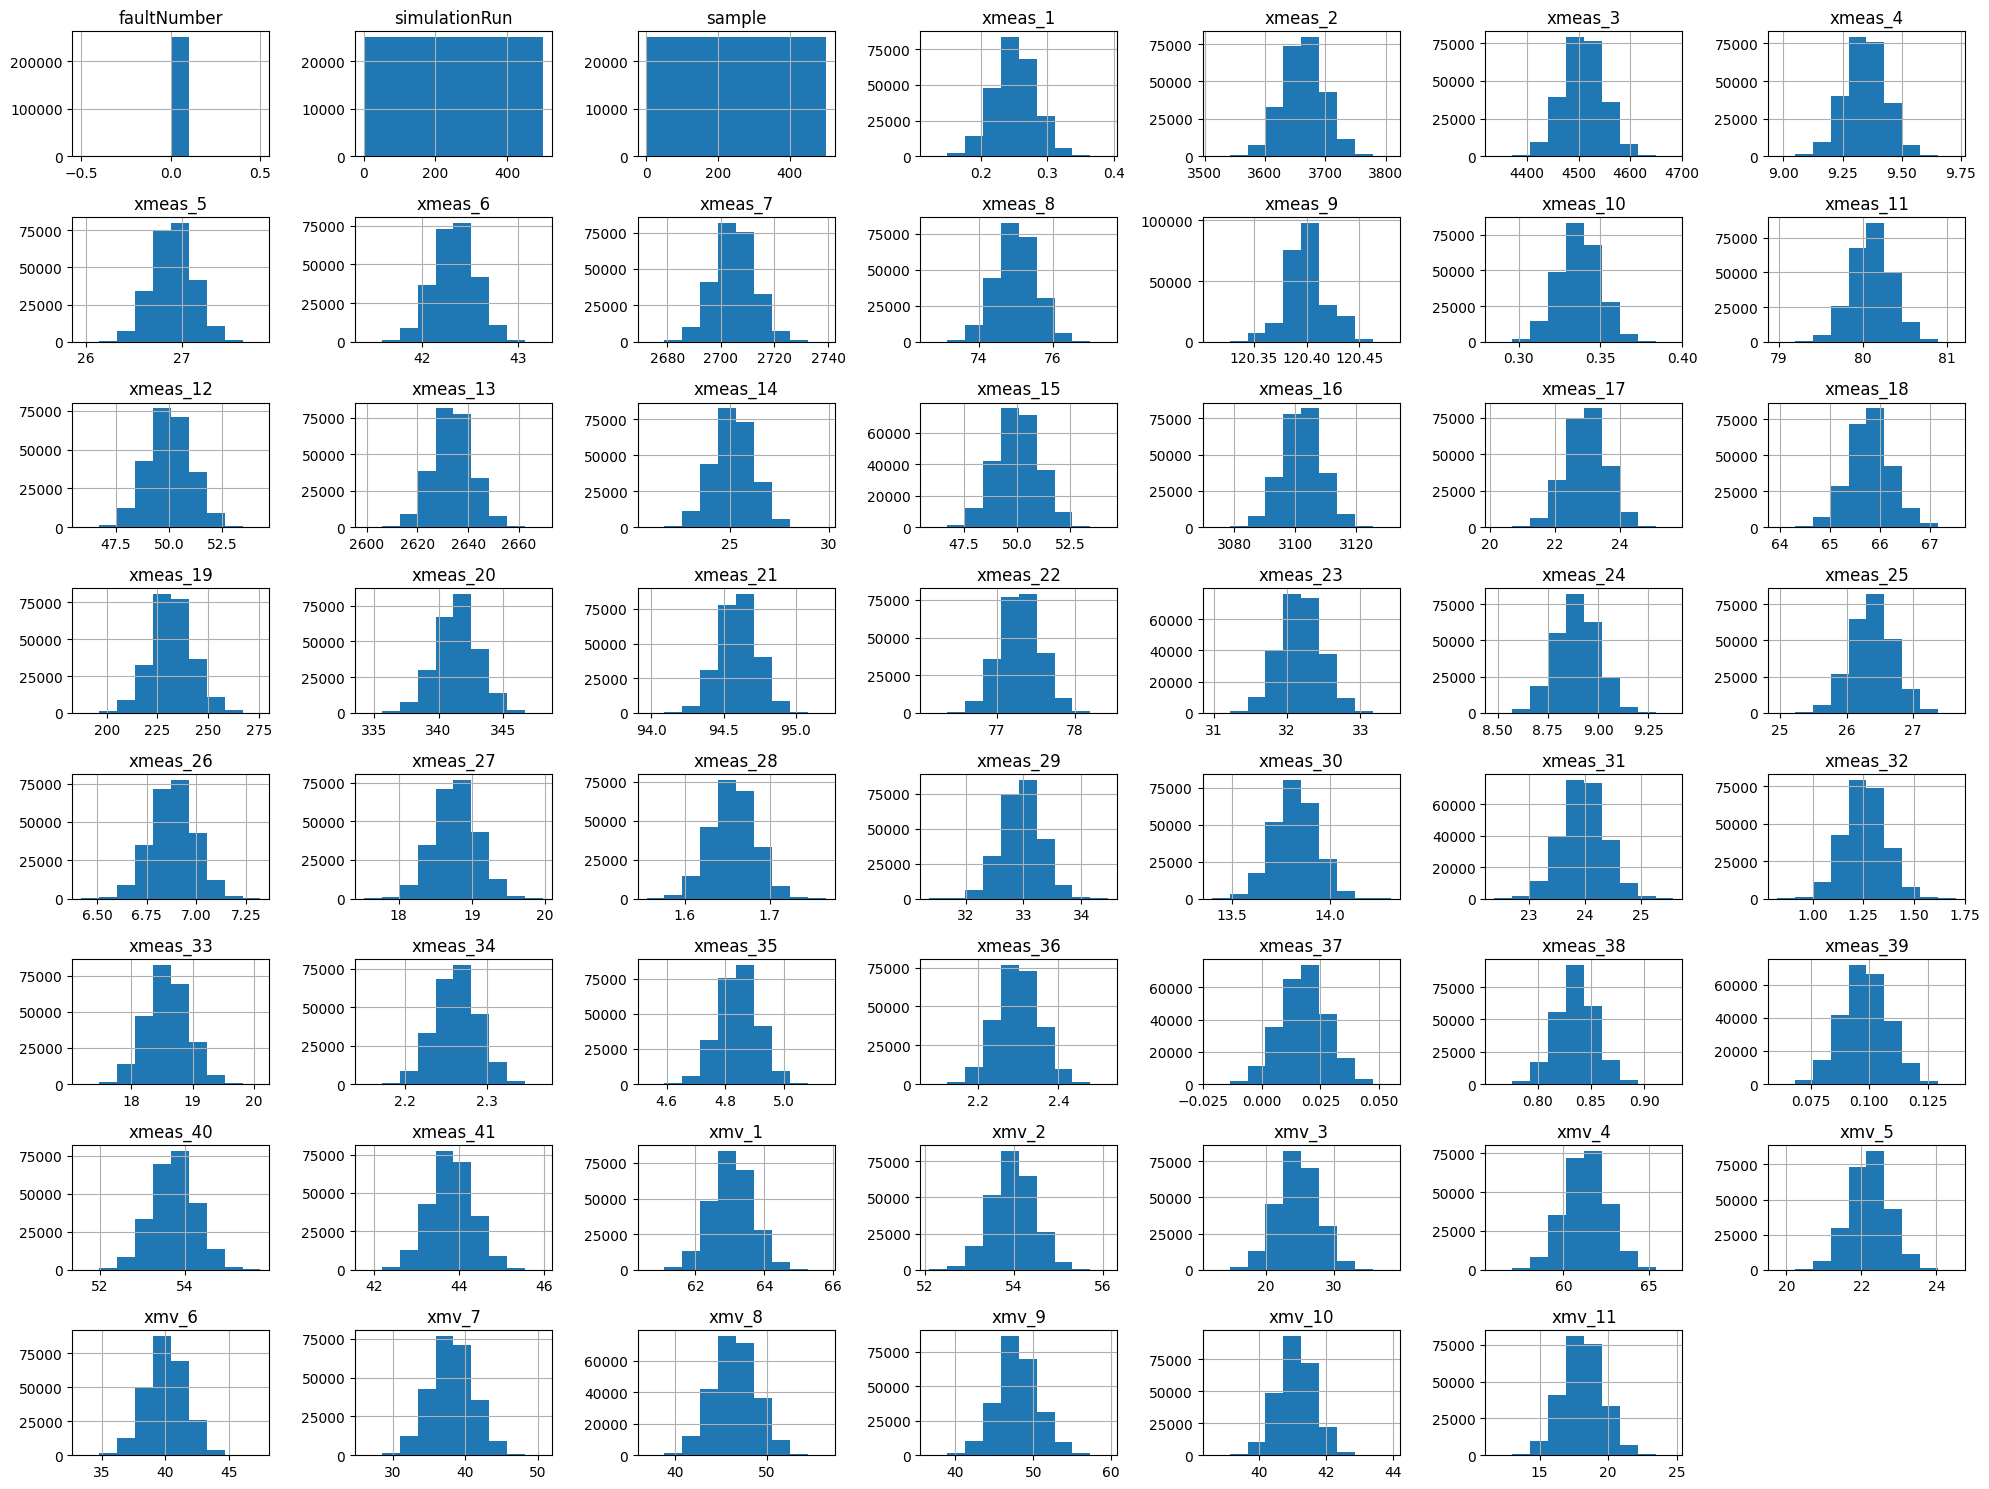

In [7]:
train_data.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

### 3.2 Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî

ÏïÑÎûòÏóêÎäî Îç∞Ïù¥ÌÑ∞Î•º ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ `plotly` ÎùºÎäî Ìå®ÌÇ§ÏßÄÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
Í∏∞Î≥∏Ï†ÅÏúºÎ°ú `requirements.txt` Ïóê Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏúºÎÇò, ÏÑ§ÏπòÌïòÏßÄ ÏïäÏùÄ Î∂ÑÎì§ÏùÄ ÏïÑÎûò Î™ÖÎ†πÏñ¥Î•º Ïã§ÌñâÌï¥Ï£ºÏãúÍ∏∞ Î∞îÎûçÎãàÎã§.

In [8]:
# ! pip install plotly

`simulationRun` Ïùò Îç∞Ïù¥ÌÑ∞ ÏñëÏÉÅÏùÑ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥, Ï≤òÏùå `5000` row Î•º Í∑∏Î†§Î≥¥Î©¥ `500` row ÎßàÎã§ `1` Ï¶ùÍ∞ÄÌïòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§ 

In [9]:
import plotly.express as px

fig = px.line(train_data[["simulationRun"]].iloc[:5000], title='simulationRun Plot')
fig.show()

`simulationRun` Î•º `sample` Îç∞Ïù¥ÌÑ∞ÏôÄ Í∞ôÏù¥ Í∑∏Î†§Î≥¥Î©¥, ÎèôÏùºÌïú `simulationRun` Í∞íÏóê ÎåÄÌï¥ `1`Î∂ÄÌÑ∞ `500`ÍπåÏßÄ Ï¶ùÍ∞ÄÌïú ÌõÑ, `simulationRun` Ïù¥ Ï¶ùÍ∞ÄÌïòÎäî ÏãúÏ†êÏóê Îã§Ïãú `1` Î°ú Ï¥àÍ∏∞Ìôî Îê®ÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.

In [10]:
from plotly.subplots import make_subplots

subfig = make_subplots(specs=[[{"secondary_y": True}]])

fig1 = px.line(train_data[["simulationRun"]].iloc[:5000])
fig2 = px.line(train_data[["sample"]].iloc[:5000])
fig2.update_traces(yaxis="y2")

subfig.layout.yaxis.title="index"
subfig.layout.yaxis.title="simulationRun"
subfig.layout.yaxis2.title="sample"
subfig.layout.title = "simulationRun and sample plot" 
subfig.add_traces(fig1.data + fig2.data)
subfig.for_each_trace(lambda t: t.update(line=dict(color=t.marker.color)))
subfig.show()

ÏúÑÏóêÏÑú ÌôïÏù∏Ìïú Í≤É Ï≤òÎüº, 1Í∞úÏùò `simulationRun` ÏùÄ `500` Í∞úÏùò `sample` Î°ú Ïù¥Î£®Ïñ¥Ï†∏ ÏûàÏúºÎØÄÎ°ú, ÏûÑÏùòÏùò `simulationRun==1` Í∞íÏóê ÎåÄÌï¥ `xmeas`, `xmv` Í∞íÏùÑ ÏãúÍ∞ÅÌôî Ìï©ÎãàÎã§.

In [11]:
from plotly.subplots import make_subplots

subfig = make_subplots(specs=[[{"secondary_y": True}]])

fig1 = px.line(train_data.query("simulationRun == 1")[["xmeas_1"]])
fig2 = px.line(train_data.query("simulationRun == 1")[["xmv_1"]])
fig2.update_traces(yaxis="y2")

subfig.layout.yaxis.title="index"
subfig.layout.yaxis.title="xmeas_1"
subfig.layout.yaxis2.title="xmv_1"
subfig.layout.title = "xmeas_1 and xmv_1 plot for simulationRun == 1" 
subfig.add_traces(fig1.data + fig2.data)
subfig.for_each_trace(lambda t: t.update(line=dict(color=t.marker.color)))
subfig.show()

### 3.2 Plot Correlation matrix

- ÏÑºÏÑú Í∞í(`xmeas`, `xmv`) Îì§Ïùò Î≥ÄÏàòÍ∞Ñ ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÎ•º Ïù¥Ìï¥ÌïòÍ∏∞ ÏúÑÌï¥, Corrleation Matrix Î•º ÏãúÍ∞ÅÌôî Ìï©ÎãàÎã§.
- Correlation Ïùò Í∞íÏù¥ 0(Ï¥àÎ°ùÏÉâ)Ïóê Í∞ÄÍπåÏö∏ ÏàòÎ°ù, Î≥ÄÏàòÍ∞Ñ ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÍ∞Ä Ï†ÅÎã§Îäî Í≤ÉÏùÑ ÎúªÌï©ÎãàÎã§.
- Î∞òÎåÄÎ°ú, Correlation Ïùò Í∞íÏù¥ 1(ÎÖ∏ÎûÄÏÉâ) ÎòêÎäî -1(ÎÇ®ÏÉâ) Ïóê Í∞ÄÍπåÏö∏ ÏàòÎ°ù, Ïñë ÎòêÎäî ÏùåÏùò ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÍ∞Ä Í∞ïÌïòÍ≤å ÎÇòÌÉÄÎÇ®ÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.
- ÏùºÎ∂Ä Î≥ÄÏàòÎì§ ÎÅºÎ¶¨ Ïñë, ÏùåÏùò ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÍ∞Ä Í∞ïÌïòÍ≤å ÎÇòÌÉÄÎÇ®ÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.

In [12]:
import pandas as pd
import plotly.graph_objects as go

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
correlation_matrix = train_data.corr()

# Plotly Î•º Ïù¥Ïö©ÌïòÏó¨ Heatmap ÏùÑ Í∑∏Î¶ΩÎãàÎã§.
fig = go.Figure(
    data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.index,
        colorscale='Viridis',
        text=correlation_matrix.round(2),  # ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÏÜåÏàòÏ†ê 2ÏûêÎ¶¨ ÍπåÏßÄ ÌëúÏãúÌï©ÎãàÎã§.
        hoverinfo='text',
    )
)
fig.update_layout(
    title='Correlation Matrix',
    xaxis=dict(title='Variables'),
    yaxis=dict(title='Variables'),
    width=800, height=800
)
fig.show()

### 3.3 Plot pairs with high/low correlations
- correlation matrix Í∞í Ï§ë, ÏÉÅÍ¥Ä Í¥ÄÍ≥Ñ Ï†àÎåÄ Í∞íÏù¥ ÎÜíÏùÄ Ï°∞Ìï©Ïùò Î≥ÄÏàòÎì§ÏùÑ Ï∞æÏïÑ Íµ¨Ï≤¥Ï†ÅÏúºÎ°ú ÏãúÍ∞ÅÌôîÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.
- Ïù¥ Îïå, correlation matrix Ïùò Îã§Ïùå Ìï≠Î™©Îì§ÏùÄ Ï†úÏô∏Ìï©ÎãàÎã§.
  - upper triangle Í∞íÍ≥º lower triangle Í∞íÏùÄ ÎèôÏùºÌïòÎØÄÎ°ú, lower triangle ÏùÄ Ï†úÏô∏Ìï©ÎãàÎã§.
  - ÏûêÍ∏∞ ÏûêÏã†Í≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎäî 1Ïù¥ÎØÄÎ°ú, diagonal ÏòÅÏó≠Ïùò Í∞íÏùÄ Ï†úÏô∏Ìï©ÎãàÎã§.

In [13]:
# correlation matrix Ïùò diagonal ÏùÑ Ï†úÏô∏Ìïú upper triangle Í∞íÏùÑ Ï∂îÏ∂úÌï©ÎãàÎã§.
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# (NxN) -> (N^2 X 1) Î°ú Î≥ÄÌôò(stack) ÌõÑ, pandas dataframe ÏùÑ ÎßåÎì≠ÎãàÎã§. 
correlation_df = upper_triangle.stack().reset_index().rename(columns={0: "correlation_value"})

- ÎÇ¥Î¶º Ï∞®ÏàúÏúºÎ°ú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Ï†ïÎ†¨ÌïòÏó¨ ÏñëÏùò ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ Î≥ÄÏàò ÏåçÏùÄ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

In [14]:
top_5_correlations = correlation_df.sort_values(by="correlation_value", ascending=False)[:5]
print(top_5_correlations)

      level_0   level_1  correlation_value
646  xmeas_12     xmv_7           1.000000
761  xmeas_15     xmv_8           1.000000
401   xmeas_7  xmeas_13           0.997386
147   xmeas_1     xmv_3           0.996587
900  xmeas_19     xmv_9           0.986063


In [15]:
def plot_pairs(data1:pd.DataFrame, data2:pd.DataFrame, correlation_value:float):
    subfig = make_subplots(specs=[[{"secondary_y": True}]])

    fig1 = px.line(data1)
    fig2 = px.line(data2)
    fig2.update_traces(yaxis="y2")
    
    name1 = data1.columns.item()
    name2 = data2.columns.item()
    subfig.layout.yaxis.title="index"
    subfig.layout.yaxis.title= name1
    subfig.layout.yaxis2.title= name2
    subfig.layout.title = f"{name1} and {name2} plot (Correlation : {correlation_value:.4f})" 
    subfig.add_traces(fig1.data + fig2.data)
    subfig.for_each_trace(lambda t: t.update(line=dict(color=t.marker.color)))
    subfig.show()

- `simulationRun == 1` Ïù∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ ÏãúÍ∞ÅÌôîÌïú Í≤∞Í≥º, ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ Îç∞Ïù¥ÌÑ∞Í∞Ä Îã§Ïàò Ï°¥Ïû¨Ìï®ÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.
  - `xmeas_12` ÏôÄ `xmv_7` Ï≤òÎüº ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÍ∞Ä `1` Ïù∏ Îç∞Ïù¥ÌÑ∞Îäî scale Ï∞®Ïù¥Îäî ÏûàÏúºÎÇò, Ï¶ù/Í∞ê Ìå®ÌÑ¥Ïù¥ ÏôÑÏ†ÑÌïòÍ≤å ÎèôÏùºÌï©ÎãàÎã§.
  - `xmeas_19` ÏôÄ `xmv_9` Ï≤òÎüº ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÍ∞Ä `1` Ïóê Í∞ÄÍπåÏö¥ Îç∞Ïù¥ÌÑ∞ÎèÑ ÎòêÌïú Îç∞Ïù¥ÌÑ∞ Ï¶ù/Í∞ê Ìå®ÌÑ¥Ïù¥ Îß§Ïö∞ Ïú†ÏÇ¨Ìï©ÎãàÎã§.

In [16]:
plot_data = train_data.query("simulationRun == 1")
for _, row in top_5_correlations.iterrows():
    plot_pairs(plot_data[[row["level_0"]]], plot_data[[row["level_1"]]], correlation_value = row["correlation_value"])

- Ïò§Î¶Ñ Ï∞®ÏàúÏúºÎ°ú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Ï†ïÎ†¨ÌïòÏó¨ ÏùåÏùò ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ Î≥ÄÏàò ÏåçÏùÄ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

In [17]:
bottom_5_correlations = correlation_df.sort_values(by="correlation_value")[:5]
print(bottom_5_correlations)

      level_0   level_1  correlation_value
835  xmeas_17    xmv_11          -0.999243
920  xmeas_20  xmeas_38          -0.581375
399   xmeas_7  xmeas_11          -0.576832
571  xmeas_11  xmeas_13          -0.565694
670  xmeas_13  xmeas_33          -0.565231


- ÎèôÏùºÌïú Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ ÏãúÍ∞ÅÌôîÌïú Í≤∞Í≥º, ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÍ∞Ä ÎÇÆÏùÄ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏùºÎ∂Ä Ï°¥Ïû¨Ìï®ÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.
  - `xmeas_17` ÏôÄ `xmv_11` Ï≤òÎüº ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÍ∞Ä `-1` Ïóê Í∞ÄÍπåÏö¥ Îç∞Ïù¥ÌÑ∞Îäî Îç∞Ïù¥ÌÑ∞ÎÅºÎ¶¨ Ï¶ù/Í∞ê Ìå®ÌÑ¥Ïù¥ Î∞òÎåÄÎ°ú ÎÇòÌÉÄÎÇòÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.
  - `xmeas_20` ÏôÄ `xmeas_38` Ï≤òÎüº ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÍ∞Ä `-0.5814` Ïù∏ Îç∞Ïù¥ÌÑ∞Îäî Ï¶ù/Í∞ê Ìå®ÌÑ¥Ïù¥ Î∞òÎåÄÎ°ú ÎÇòÌÉÄÎÇòÎäî ÏñëÏÉÅÏù¥ ÏùºÎ∂ÄÎ∂Ñ Î≥¥Ïù¥Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.

In [18]:
for _, row in bottom_5_correlations.iterrows():
    plot_pairs(plot_data[[row["level_0"]]], plot_data[[row["level_1"]]], correlation_value = row["correlation_value"])

### Í≥†ÎØºÌï¥Î≥º ÏÇ¨Ìï≠ ü§î
- ÏùºÎ∞òÏ†ÅÏù∏ ML Model ÏóêÏÑú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä Í±∞Ïùò 1Ïù∏ Î≥ÄÏàòÎì§Ïùò Í≤ΩÏö∞, Ï§ëÎ≥µÎêú Ï†ïÎ≥¥ÎüâÏùÑ Îã¥Í≥† ÏûàÏúºÎØÄÎ°ú ÌïôÏäµÏóê Ï†úÍ±∞ÌïòÎäî Í≤ΩÏö∞Í∞Ä ÏûàÏäµÎãàÎã§.
- ÌïòÏßÄÎßå ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïù∏ **Ï†ïÏÉÅ Îç∞Ïù¥ÌÑ∞ ÎåÄÌï¥ ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÎ•º Í≥ÑÏÇ∞** Ìïú Í≤ÉÏù¥Í≥†, ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞ÏóêÏÑ† ÎèôÏùº Îç∞Ïù¥ÌÑ∞Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä Îã¨ÎùºÏßà Ïàò ÏûàÏäµÎãàÎã§.
- Ïã§Ï†ú ÌôîÌïô Í≥µÏ†ïÏóêÏÑú Ïù¥ÏÉÅÏù¥ Î∞úÏÉùÌïòÎäî Í≤ΩÏö∞Îäî ÌäπÏ†ï Î≥ÄÏàòÎì§Í≥ºÏùò ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÍ∞Ä Íπ®ÏßÄÎäî Í≤ΩÏö∞ÎèÑ Ìè¨Ìï®Îê† Ïàò ÏûàÏäµÎãàÎã§.
- Îî∞ÎùºÏÑú, ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÏóê Îî∞Îùº Î≥ÄÏàòÎ•º ÏÑ†ÌÉùÌï†ÏßÄ Ï†úÍ±∞Ìï†ÏßÄ Í≤∞Ï†ïÌï† Îïê **Î™®Îç∏Ïùò ÏÑ±Îä•**Í≥º Í∞ôÏù¥ Í≥†Î†§ÌïòÎäî Í≤ÉÏù¥ Î∞îÎûåÏßÅÌï©ÎãàÎã§.

### 4. Data Process

- `simulationRun` Í≥º `sample` Î≥ÄÏàòÎäî ÌÅ∞ Ï†ïÎ≥¥ÎüâÏùÑ Îã¥Í≥† ÏûàÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê, Í≥µÏ†ïÏùò ÏÑºÏÑú Í∞íÏùÑ Î∞òÏòÅÌïòÎäî Î≥ÄÏàòÎì§ÏùÑ ÏÑ†ÌÉùÌï©ÎãàÎã§.
- Îî∞ÎùºÏÑú, `process_data` Ìï®ÏàòÏóêÏÑúÎäî `xmeas`, `xmv` ÏôÄ Í∞ôÏùÄ Ïà´ÏûêÌòï Î≥ÄÏàòÎì§ÏùÑ(numerical value) Ï¥àÎèÑ Î™®Îç∏ ÌïôÏäµÏóê ÏÇ¨Ïö©Ìï©ÎãàÎã§.
- Ï†ïÍ∑úÌôîÏôÄ feature engineeringÏùò Í≥ºÏ†ïÏùÄ Ìè¨Ìï®ÎêòÏßÄ ÏïäÏïòÏúºÎØÄÎ°ú, `process_data` Ìï®Ïàò Ï†Ñ, ÌõÑÎ°ú Îçî Îã§ÏñëÌïú Ï†ÑÏ≤òÎ¶¨ Í≥ºÏ†ïÏùÑ Ï∂îÍ∞ÄÌï¥Î≥¥ÏãúÍ∏∏ Í∂åÏû•Ìï©ÎãàÎã§.

In [19]:
def process_data(df) -> pd.DataFrame:
    numeric_cols = [
        'xmeas_1', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13', 'xmeas_14',
        'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19', 'xmeas_2',
        'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25',
        'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_3', 'xmeas_30',
        'xmeas_31', 'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36',
        'xmeas_37', 'xmeas_38', 'xmeas_39', 'xmeas_4', 'xmeas_40', 'xmeas_41',
        'xmeas_5', 'xmeas_6', 'xmeas_7', 'xmeas_8', 'xmeas_9', 'xmv_1',
        'xmv_10', 'xmv_11', 'xmv_2', 'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6',
        'xmv_7', 'xmv_8', 'xmv_9'
    ]
    return df[numeric_cols]

In [20]:
train_X = process_data(train_data)

### 5. Model Training

- ÏúÑÏóêÏÑú Ï†ÑÏ≤òÎ¶¨Ìïú `train_X` Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ ÌïôÏäµÌï©ÎãàÎã§.
- Ï¥àÍ∏∞ baseline model ÏùÄ `scikit-learn` Ïùò `IsolationForest` ÏôÄ `SGDOneClassSVM` Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌñàÏäµÎãàÎã§.
- Í∞Å ModelÏùò HyperParameter TuningÏùÑ ÏúÑÌïú Validation Set ÏùÄ Îî∞Î°ú Íµ¨ÏÑ±ÌïòÏßÄ ÏïäÏïòÏäµÎãàÎã§. Îã§ÏñëÌïú Î∞©ÏãùÏúºÎ°ú Íµ¨ÏÑ±ÌïòÎ©∞ ModelÏùÑ Í≥†ÎèÑÌôîÌï¥Î≥¥ÏãúÍ∏∏ Í∂åÏû•ÎìúÎ¶ΩÎãàÎã§.
- Model Î≥ÑÎ°ú Tuning Í∞ÄÎä•Ìïú Parameter Ï†ïÎ≥¥Îäî Îã§Ïùå document Î•º Ï∞∏Í≥†ÌïòÏãúÍ∏∞ Î∞îÎûçÎãàÎã§.
  - [Isolation Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest)
  - [SGDOneClassSVM](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDOneClassSVM.html#sklearn.linear_model.SGDOneClassSVM)

In [21]:
def train(train_X: pd.DataFrame, model_type: str) -> Union[IsolationForest, SGDOneClassSVM]:
    if model_type == "IsolationForest":
        model = IsolationForest(random_state=RANDOM_SEED)
    elif model_type == "SGDOneClassSVM":
        model = SGDOneClassSVM(random_state=RANDOM_SEED)
    model.fit(train_X)
    return model

In [22]:
model = train(train_X=train_X, model_type="IsolationForest")

In [23]:
model = IsolationForest(random_state=RANDOM_SEED)
model.fit(train_X)

IsolationForest(random_state=42)

### 6. Model Inference
- ÌïôÏäµÎêú IsolationForest, SGDOneClassSVM Î™®Îç∏Ïùò Í≤∞Í≥ºÎ•º Ï∂îÎ°†Ìï©ÎãàÎã§.

### Ï£ºÏùòÌï† Ï†êüö®
- Î¶¨ÎçîÎ≥¥ÎìúÏóêÏÑú Ï±ÑÏ†êÎêòÎäî ÌèâÍ∞Ä ÏΩîÎìúÎäî Label Ïù∏ `faultNumber` Ïóê ÎåÄÌï¥ Ï†ïÏÉÅÏùÑ `0`, ÎπÑÏ†ïÏÉÅÏùÑ `1` Î°ú Ï±ÑÏ†êÌï©ÎãàÎã§.
- ÌïòÏßÄÎßå `IsolationForest` Í∞ôÏùÄ Î™®Îç∏ÏùÄ Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Ï†ïÏÉÅÏùÑ `1`, ÎπÑÏ†ïÏÉÅÏùÑ `-1` Ï∂úÎ†•Ìï©ÎãàÎã§. Îî∞ÎùºÏÑú Ìï¥Îãπ Î™®Îç∏Ïùò Inference Í≤∞Í≥º Ï†ÄÏû• Ïãú `faultNumber` Ïù∏ columnÏóê Ï†ïÏÉÅÏùÑ `0`, ÎπÑÏ†ïÏÉÅÏùÑ `1` Î°ú Î≥ÄÌôòÌï¥ÏïºÌï®ÏùÑ Ïú†ÏùòÌï¥Ï£ºÏãúÍ∏∞ Î∞îÎûçÎãàÎã§.
- ÏïÑÎûò `inference` Ìï®ÏàòÏóêÏÑ† Ìï¥Îãπ Î≥ÄÌôò ÏΩîÎìúÎ•º ÏòàÏãúÎ°ú Ïù¥ÎØ∏ Ï∂îÍ∞ÄÌñàÏäµÎãàÎã§.

In [24]:
def inference(test_X: pd.DataFrame, model):
    label_col = ["faultNumber"]
    pred_y = model.predict(test_X)
    if -1 in pred_y:
        # inliers: 1 -> 0 , outliers: -1 -> 1
        pred_y = (pred_y == -1).astype(int)
    return pd.DataFrame(pred_y, columns=label_col, index=test_X.index)

- ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º Load ÌïòÏó¨ ÌôïÏù∏Ìï©ÎãàÎã§.
- ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Îäî Ï¥ù 710400 Í∞úÏùò row ÏôÄ Label columnÏù∏ `faultNumber` Í∞Ä Ï†úÏô∏Îêú 54Í∞úÏùò columnÏùÑ Í∞ñÍ≥† ÏûàÏäµÎãàÎã§.

In [25]:
test_data = pd.read_csv(DATA_PATH / "test.csv")
print(test_data.shape)

(710400, 54)


In [26]:
test_data.describe()

sample  simulationRun        xmeas_1       xmeas_10  \
count  710400.000000  710400.000000  710400.000000  710400.000000   
mean      480.500000     369.500000       0.249465       0.341095   
std       277.128174     213.619555       0.083627       0.054919   
min         1.000000       0.000000      -0.003384       0.031363   
25%       240.750000     184.750000       0.225920       0.327170   
50%       480.500000     369.500000       0.250260       0.336840   
75%       720.250000     554.250000       0.273970       0.346450   
max       960.000000     739.000000       1.016700       0.802510   

            xmeas_11       xmeas_12       xmeas_13       xmeas_14  \
count  710400.000000  710400.000000  710400.000000  710400.000000   
mean       79.953159      49.986619    2641.728123      25.122148   
std         1.157381       1.004389      53.145656       1.071866   
min        69.702000      45.411000    2370.600000      19.903000   
25%        79.912000      49.289000    2627.600000      24.424000   
50%        80.103000      49.995000    2633.700000      25.138000   
75%        80.288000      50.663000    2640.000000      25.840000   
max        86.631000      55.481000    2944.700000      31.182000   

            xmeas_15       xmeas_16  ...         xmv_10         xmv_11  \
count  710400.000000  710400.000000  ...  710400.000000  710400.000000   
mean       49.978389    3110.263553  ...      41.259162      18.557391   
std         1.015070      51.116985  ...       7.381448       4.632228   
min        45.226000    2898.600000  ...      -0.235790      -0.002547   
25%        49.285000    3097.400000  ...      40.702000      17.144000   
50%        49.962000    3102.300000  ...      41.117000      18.201000   
75%        50.671000    3107.500000  ...      41.538000      19.295000   
max        54.792000    3449.200000  ...     100.230000     100.010000   

               xmv_2          xmv_3          xmv_4          xmv_5  \
count  710400.000000  710400.000000  710400.000000  710400.000000   
mean       54.433897      25.987605      62.379721      23.152410   
std         5.269215      11.779155       5.901141       9.787915   
min        21.135000      -0.142390      30.795000      -0.061391   
25%        53.625000      22.393000      60.446000      21.772000   
50%        53.982000      24.735500      61.383000      22.193000   
75%        54.346000      27.120000      62.362000      22.610000   
max       100.000000     100.110000     100.020000     100.070000   

               xmv_6          xmv_7          xmv_8          xmv_9  
count  710400.000000  710400.000000  710400.000000  710400.000000  
mean       39.815532      38.060625      46.483987      48.282547  
std         8.796930       2.955771       2.349162      11.511533  
min         0.000000      24.594000      35.486000      -0.654130  
25%        38.838000      36.006000      44.879000      45.850000  
50%        40.027000      38.085000      46.445000      47.863000  
75%        41.201000      40.050000      48.087000      50.153000  
max        95.638000      54.230000      57.625000     100.490000  

[8 rows x 54 columns]

- ÌïòÎÇòÏùò `simulationRun` Ïóê ÎåÄÌï¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Í∞Ä `500` Í∞ú `sample` Ïù∏ Î∞òÎ©¥, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Îäî `960` Í∞úÏùò `sample` Î°ú Ïù¥Î£®Ïñ¥Ï†∏ ÏûàÏäµÎãàÎã§.
- ÎòêÌïú, `simulationRun` Î≤àÌò∏Í∞Ä Ï†êÏßÑÏ†ÅÏúºÎ°ú Ï¶ùÍ∞ÄÌïòÏßÄ ÏïäÍ≥†, Ï†ïÏÉÅ/ÎπÑÏ†ïÏÉÅÏù∏ `simulationRun` Ïù¥ Î¨¥ÏûëÏúÑÎ°ú ÏÑûÏó¨ÏûàÏäµÎãàÎã§.

In [27]:
subfig = make_subplots(specs=[[{"secondary_y": True}]])

fig1 = px.line(test_data[["simulationRun"]].iloc[:5000])
fig2 = px.line(test_data[["sample"]].iloc[:5000])
fig2.update_traces(yaxis="y2")

subfig.layout.yaxis.title="index"
subfig.layout.yaxis.title="simulationRun"
subfig.layout.yaxis2.title="sample"
subfig.layout.title = "Test data simulationRun and sample plot" 
subfig.add_traces(fig1.data + fig2.data)
subfig.for_each_trace(lambda t: t.update(line=dict(color=t.marker.color)))
subfig.show()

- ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Í≤∞Í≥ºÎ•º Ï∂îÎ°†ÌïòÏó¨ Í≤∞Í≥ºÎ•º ÌôïÏù∏Ìï©ÎãàÎã§.
  - `faultNumber` Ïù∏ columnÏóê Î™®Îç∏ Ï∂úÎ†• Í∞í Ï†ïÏÉÅÏù¥ `0`, ÎπÑÏ†ïÏÉÅÏù¥ `1` Ïù¥ pandas DataFrame ÌòïÌÉúÎ°ú Ï†ÄÏû•ÎêêÎäîÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.

In [28]:
test_X = process_data(test_data)
pred_df = inference(test_X=test_X, model=model)
print(pred_df)

        faultNumber
0                 0
1                 0
2                 0
3                 0
4                 0
...             ...
710395            1
710396            1
710397            1
710398            1
710399            1

[710400 rows x 1 columns]


- Î™®Îç∏ Ï∂îÎ°† Í≤∞Í≥ºÏùò Ï†ïÏÉÅ / ÎπÑÏ†ïÏÉÅ ÎπÑÏú®ÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§.

In [29]:
pred_df.value_counts()

faultNumber
0              605196
1              105204
Name: count, dtype: int64

In [35]:
predict = model.score_samples(test_X)
predict

array([-0.38049835, -0.38589866, -0.41274621, ..., -0.62355379,
       -0.62759516, -0.62759516])

<Axes: >

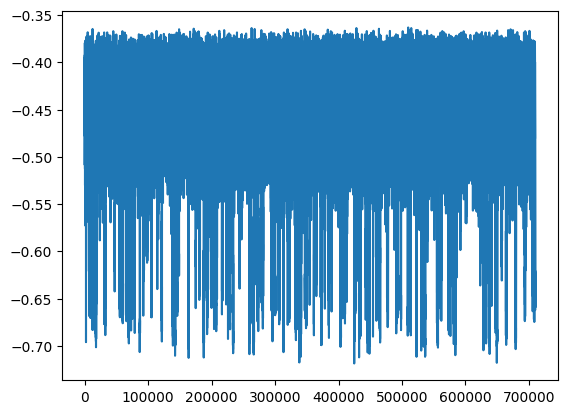

In [37]:
import seaborn as sns

sns.lineplot(predict)

- Î¶¨ÎçîÎ≥¥Îìú Ï†úÏ∂úÏùÑ ÏúÑÌï¥ Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï©ÎãàÎã§.
- `to_csv()` Ïùò default setting ÏùÄ index ÍπåÏßÄ Î≥¥Ï°¥ÌïòÎäî `index=True` ÏûÖÎãàÎã§. Ï±ÑÏ†êÌïòÎäî evaluation ÏΩîÎìúÏóêÏÑúÎèÑ indexÍ∞Ä Î≥¥Ï°¥Îê®ÏùÑ Í∞ÄÏ†ïÌïòÍ≥† ÏûàÏñ¥ `index=True` ÏÑ∏ÌåÖÏùÑ ÏßÄÏºúÏ£ºÏãúÍ∏∞ Î∞îÎûçÎãàÎã§.

In [28]:
pred_df.to_csv("output.csv")